# Chapter 3 Problems 

> of "<ins>Modern Compressible Flow With Historical Perspective</ins>", Third Edition, John D. Anderson Jr

In [1]:
import pint
import pygasflow
from pygasflow.solvers import *
import numpy as np

ureg = pint.UnitRegistry()
# to imperial units
ureg.define("pound_mass = 0.45359237 kg = lbm")
# use "~P" to format units with unicode
ureg.formatter.default_format = "~"
# let pygasflow knows which UnitRegistry to use
pygasflow.defaults.pint_ureg = ureg
# dictionary results offers improved code readability
pygasflow.defaults.solver_to_dict = True

# shorcuts for conveniance
kg = ureg.kg
K = ureg.K
degR = ureg.degR
degC = ureg.degC
J = ureg.J
m = ureg.m
atm = ureg.atm
Pa = ureg.pascal
sec = ureg.s
lb = ureg.lb
ft = ureg.feet
ft_lb = ureg.ft_lb
slug = ureg.slug
Q_ = ureg.Quantity

gamma = 1.4
R = 287.05 * J / (kg * K)

## P 3.1

In [2]:
M = 0.7
p = 0.9 * atm
T = 250 * K

In [3]:
res = isentropic_solver("m", M, gamma, to_dict=True)
res.show()

key     quantity            
----------------------------
m       M                        0.70000000
pr      P / P0                   0.72092786
dr      rho / rho0               0.79157879
tr      T / T0                   0.91074681
prs     P / P*                   1.36466537
drs     rho / rho*               1.24866881
trs     T / T*                   1.09289617
urs     U / U*                   0.73179172
ars     A / A*                   1.09437268
ma      Mach Angle                      nan
pm      Prandtl-Meyer                   nan


In [4]:
P0 = (1 / res["pr"]) * p
T0 = (1 / res["tr"]) * T
ps = (1 / res["prs"]) * p
Ts = (1 / res["trs"]) * T
a_star = np.sqrt(gamma * R * Ts)

In [5]:
quantities = [P0, T0, ps, Ts, a_star]
labels = ["P0", "T0", "p*", "T*", "a*"]
for q, l in zip(quantities, labels):
    print(l, "=", q)

P0 = 1.248391203471733 atm
T0 = 274.49999999999994 K
p* = 0.6595023367404417 atm
T* = 228.74999999999997 K
a* = 303.1959143854019 J ** 0.5 / kg ** 0.5


## P 3.2

In [6]:
p = 5e04 * Pa
T = 200 * K
p0 = 1.5e06 * Pa

In [7]:
pr = p / p0
res = isentropic_solver("pressure", pr, gamma, to_dict=True)
res.show()

key     quantity            
----------------------------
m       M                        2.86585027
pr      P / P0                   0.03333333
dr      rho / rho0               0.08808732
tr      T / T0                   0.37841240
prs     P / P*                   0.06309764
drs     rho / rho*               0.13895254
trs     T / T*                   0.45409488
urs     U / U*                   1.93119797
ars     A / A*                   3.72654782
ma      Mach Angle [deg]        20.42228556
pm      Prandtl-Meyer [deg]     47.10098339


In [8]:
print("Mach =", res["m"])

Mach = 2.8658502699286807


In [9]:
T0 = (1 / res["tr"]) * T
T0

<Quantity(528.523911, 'kelvin')>

## P 3.3

In [10]:
U = 3000 * ft / sec
T = 500 * degR

In [11]:
a = np.sqrt(gamma * R * T.to("kelvin")).to("m/s")
a

<Quantity(334.111591, 'meter / second')>

In [12]:
M = U.to("m/s") / a
M

<Quantity(2.73681017, 'dimensionless')>

In [13]:
from pygasflow.generic import characteristic_mach_number
M_star = characteristic_mach_number(M)
M_star

<Quantity(1.89686674, 'dimensionless')>

## P 3.4

In [14]:
M1 = 3
p1 = 1 * atm
rho1 = 1.23 * kg / m**3

In [15]:
T1 = (273.15 + 20) * K
T1

<Quantity(293.15, 'kelvin')>

In [16]:
res_ise = isentropic_solver("m", M1, gamma)
res_ise.show()

key     quantity            
----------------------------
m       M                        3.00000000
pr      P / P0                   0.02722368
dr      rho / rho0               0.07622631
tr      T / T0                   0.35714286
prs     P / P*                   0.05153250
drs     rho / rho*               0.12024251
trs     T / T*                   0.42857143
urs     U / U*                   1.96396101
ars     A / A*                   4.23456790
ma      Mach Angle              19.47122063
pm      Prandtl-Meyer           49.75734674


In [17]:
T01 = (1 / res_ise["tr"]) * T1
T01

<Quantity(820.82, 'kelvin')>

In [18]:
p01 = (1 / res_ise["pr"]) * p1
p01

<Quantity(36.7327218, 'standard_atmosphere')>

In [19]:
res_shock = normal_shockwave_solver("mu", M1, gamma=gamma)
res_shock.show()

key     quantity     
---------------------
mu      Mu                3.00000000
md      Md                0.47519096
pr      pd/pu            10.33333333
dr      rhod/rhou         3.85714286
tr      Td/Tu             2.67901235
tpr     p0d/p0u           0.32834389


In [20]:
p2 = res_shock["pr"] * p1
p2

<Quantity(10.3333333, 'standard_atmosphere')>

In [21]:
T2 = res_shock["tr"] * T1
T2

<Quantity(785.352469, 'kelvin')>

In [22]:
rho2 = res_shock["dr"] * rho1
rho2

<Quantity(4.74428571, 'kilogram / meter ** 3')>

In [23]:
p02 = res_shock["tpr"] * p01
p02

<Quantity(12.0609647, 'standard_atmosphere')>

In [24]:
T02 = T01
T02

<Quantity(820.82, 'kelvin')>

In [25]:
u2 = (np.sqrt(gamma * R * T1) * res_shock["md"]).to("m / s")
u2

<Quantity(163.100734, 'meter / second')>

## P 3.5

In [26]:
from pygasflow.shockwave import rayleigh_pitot_formula, m1_from_rayleigh_pitot_pressure_ratio

pr_sonic = rayleigh_pitot_formula(1, gamma)
pr_sonic

np.float64(1.892929158737854)

### (a)

In [27]:
p02 = 1.22e05 * Pa
p1 = 1.01e05 * Pa

In [28]:
pr = p02 / p1
pr

<Quantity(1.20792079, 'dimensionless')>

Because pr < pr_sonic, the Mach number must be subsonic. Hence, isentropic relations:

In [29]:
res = isentropic_solver("pressure", p1 / p02)
res.show()

key     quantity            
----------------------------
m       M                        0.52656721
pr      P / P0                   0.82786885
dr      rho / rho0               0.87377799
tr      T / T0                   0.94745903
prs     P / P*                   1.56709709
drs     rho / rho*               1.37833320
trs     T / T*                   1.13695084
urs     U / U*                   0.56146754
ars     A / A*                   1.29217439
ma      Mach Angle [deg]                nan
pm      Prandtl-Meyer [deg]             nan


In [30]:
M1 = res["m"]
M1

np.float64(0.5265672087837046)

### (b)

In [31]:
p02 = 7222 * lb / ft**2
p1 = 2116 * lb / ft**2

In [32]:
pr = p02 / p1
pr

<Quantity(3.41304348, 'dimensionless')>

Because pr > pr_sonic, there is a normal shock wave:

In [33]:
M1 = m1_from_rayleigh_pitot_pressure_ratio(pr, gamma)
M1

np.float64(1.4999388067617616)

### (c)

In [34]:
p02 = 13107 * lb / ft**2
p1 = 1020 * lb / ft**2

In [35]:
pr = p02 / p1
pr

<Quantity(12.85, 'dimensionless')>

Because pr > pr_sonic, there is a normal shock wave:

In [36]:
M1 = m1_from_rayleigh_pitot_pressure_ratio(pr, gamma)
M1

np.float64(3.1005608737676624)

## P 3.6

/home/davide/Documents/Development/envs/pygas/lib/python3.12/site-packages/matplotlib/cbook.py:1355: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


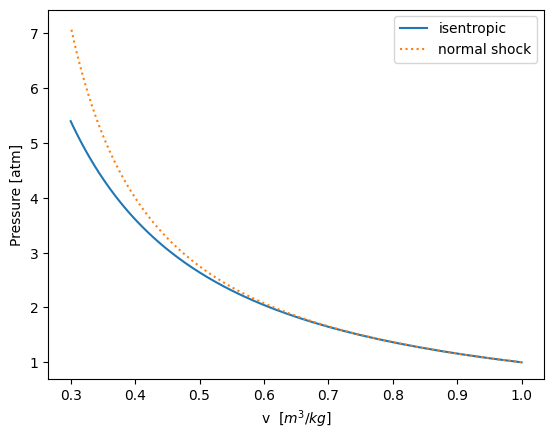

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from pygasflow import shock_compression, isentropic_compression
import pint

ureg = pint.UnitRegistry()

p1 = 1 * atm
v1 = 1 * m**3
v2 = 0.3 * m**3

rho1 = 1 / v1
rho2 = 1 / v2

dr = np.linspace(rho1, rho2) / rho1
pr_ise, dr_ise, tr_ise = isentropic_compression(dr=dr, gamma=1.4, to_dict=False)
pr_shock, dr_shock = shock_compression(dr=dr, gamma=1.4, to_dict=False)

fig, ax = plt.subplots()
ax.plot(1 / (dr_ise * rho1), pr_ise * p1, label="isentropic")
ax.plot(1 / (dr_shock * rho1), pr_shock * p1, ":", label="normal shock")
ax.legend()
ax.set_xlabel("v  [$m^{3}/kg$]")
ax.set_ylabel("Pressure [atm]")
plt.show()

For a specified change in specific volume, the shock compression is stronger than the isentropic one. However, shock compression is less efficient due to the total pressure loss across the shock wave.

## P 3.7

In [38]:
M = 38
T = 270 * K
gamma = 1.4

In [39]:
res = isentropic_solver("m", M, gamma)
res.show()

key     quantity            
----------------------------
m       M                       38.00000000
pr      P / P0                   0.00000000
dr      rho / rho0               0.00000070
tr      T / T0                   0.00345066
prs     P / P*                   0.00000000
drs     rho / rho*               0.00000110
trs     T / T*                   0.00414079
urs     U / U*                   2.44525992
ars     A / A*              370653.24671053
ma      Mach Angle               1.50795775
pm      Prandtl-Meyer          122.92471032


In [40]:
T0 = 1 / res["tr"] * T
T0

<Quantity(78246.0, 'kelvin')>

## P 3.8

In [41]:
from pygasflow.rayleigh import specific_heat

p1 = 1 * atm
T1 = 288 * K
gas = gas_solver("gamma", 1.4, "R", R)
Cp = gas["Cp"]
Cp

<Quantity(1004.675, 'joule / kilogram / kelvin')>

### (a)

In [42]:
M1 = 2

In [43]:
res_ise = isentropic_solver("m", M1)
res_ise.show()

key     quantity            
----------------------------
m       M                        2.00000000
pr      P / P0                   0.12780453
dr      rho / rho0               0.23004815
tr      T / T0                   0.55555556
prs     P / P*                   0.24192491
drs     rho / rho*               0.36288737
trs     T / T*                   0.66666667
urs     U / U*                   1.63299316
ars     A / A*                   1.68750000
ma      Mach Angle              30.00000000
pm      Prandtl-Meyer           26.37976081


In [44]:
T0 = (1 / res_ise["tr"]) * T1
T0

<Quantity(518.4, 'kelvin')>

In [45]:
res = rayleigh_solver("m", M1)
res.show()

key     quantity     
---------------------
m       M                 2.00000000
prs     P / P*            0.36363636
drs     rho / rho*        0.68750000
trs     T / T*            0.52892562
tprs    P0 / P0*          1.50309598
ttrs    T0 / T0*          0.79338843
urs     U / U*            1.45454545
eps     (s*-s) / R        1.21757521


In [46]:
T0s = (1 / res["ttrs"]) * T0
T0s

<Quantity(653.4, 'kelvin')>

In [47]:
Cp

<Quantity(1004.675, 'joule / kilogram / kelvin')>

In [48]:
T0s

<Quantity(653.4, 'kelvin')>

In [49]:
q = specific_heat(Cp, T0, T0s)
q

<Quantity(135631.125, 'joule / kilogram')>

### (b)

In [50]:
M1 = 0.2

In [51]:
res_ise = isentropic_solver("m", M1)
T0 = (1 / res_ise["tr"]) * T1
T0

<Quantity(290.304, 'kelvin')>

In [52]:
res = rayleigh_solver("m", M1)
T0s = (1 / res["ttrs"]) * T0
T0s

<Quantity(1672.704, 'kelvin')>

In [53]:
q = specific_heat(Cp, T0, T0s)
q

<Quantity(1388862.72, 'joule / kilogram')>

## P 3.9

In [54]:
p1 = 10 * atm
T1 = 1000 * degR
M1 = 0.2
q_fuel = 4.5e08 * ft_lb / slug
f_a = 0.06

In [55]:
res_ise = isentropic_solver("m", M1, gamma)
res_ise.show()

key     quantity            
----------------------------
m       M                        0.20000000
pr      P / P0                   0.97249670
dr      rho / rho0               0.98027668
tr      T / T0                   0.99206349
prs     P / P*                   1.84086737
drs     rho / rho*               1.54632859
trs     T / T*                   1.19047619
urs     U / U*                   0.21821789
ars     A / A*                   2.96352000
ma      Mach Angle                      nan
pm      Prandtl-Meyer                   nan


In [56]:
T01 = (1 / res_ise["tr"]) * T1
T01

<Quantity(1008.0, 'degree_Rankine')>

In [57]:
res_ray = rayleigh_solver("m", M1, gamma)
res_ray.show()

key     quantity     
---------------------
m       M                 0.20000000
prs     P / P*            2.27272727
drs     rho / rho*       11.00000000
trs     T / T*            0.20661157
tprs    P0 / P0*          1.23459588
ttrs    T0 / T0*          0.17355372
urs     U / U*            0.09090909
eps     (s*-s) / R        6.34018207


In [58]:
T1s = (1 / res_ray["trs"]) * T1
T1s

<Quantity(4840.0, 'degree_Rankine')>

In [59]:
p1s = (1 / res_ray["prs"]) * p1
p1s

<Quantity(4.4, 'standard_atmosphere')>

In [60]:
T01s = (1 / res_ray["ttrs"]) * T01
T01s

<Quantity(5808.0, 'degree_Rankine')>

In [61]:
gas = gas_solver("gamma", gamma, "R", R)
Cp = gas["Cp"]
Cp

<Quantity(1004.675, 'joule / kilogram / kelvin')>

In [62]:
from sympy import symbols, solve, Eq
a, f = symbols("a, f", positive=True)
e1 = Eq(f / a, f_a)
e2 = Eq(1, f + a)
sol = solve([e1, e2], [f, a])
sol

{a: 0.943396226415094, f: 0.0566037735849057}

In [63]:
mdot = 100 * (slug / sec)
mdot_air = mdot * float(sol[a])
mdot_fuel = mdot * float(sol[f])
print("Air mass flow rate:", mdot_air)
print("Fuel mass flow rate:", mdot_fuel)

Air mass flow rate: 94.33962264150944 slug / s
Fuel mass flow rate: 5.660377358490567 slug / s


In [64]:
qdot = q_fuel * mdot_fuel
qdot

<Quantity(2.54716981e+09, 'foot_pound / second')>

In [65]:
q = qdot / mdot
q

<Quantity(25471698.1, 'foot_pound / slug')>

In [66]:
T02 = (q / Cp + T01).to("rankine")
T02

<Quantity(5247.69616, 'degree_Rankine')>

In [67]:
res_ray_2 = rayleigh_solver("total_temperature_super", T02 / T01s, gamma)
res_ray_2.show()

key     quantity     
---------------------
m       M                 1.52281760
prs     P / P*            0.56516296
drs     rho / rho*        0.76301054
trs     T / T*            0.74070138
tprs    P0 / P0*          1.13297391
ttrs    T0 / T0*          0.90352895
urs     U / U*            1.31059789
eps     (s*-s) / R        0.47991089


In [68]:
P2 = res_ray_2["prs"] * p1s
P2

<Quantity(2.48671702, 'standard_atmosphere')>

In [69]:
T2 = res_ray_2["trs"] * T1s
T2

<Quantity(3584.99468, 'degree_Rankine')>

## P 3.10

In [70]:
rayleigh_solver("m", 1).show()

key     quantity     
---------------------
m       M                 1.00000000
prs     P / P*            1.00000000
drs     rho / rho*        1.00000000
trs     T / T*            1.00000000
tprs    P0 / P0*          1.00000000
ttrs    T0 / T0*          1.00000000
urs     U / U*            1.00000000
eps     (s*-s) / R       -0.00000000


In [71]:
T02s = T01s
T02s

<Quantity(5808.0, 'degree_Rankine')>

In [72]:
T02 = T02s
T02

<Quantity(5808.0, 'degree_Rankine')>

In [73]:
q = Cp * (T02 - T01)
q = q.to("footpound / slug")
q

<Quantity(28837951.2, 'foot_pound / slug')>

In [74]:
qdot = mdot * q
qdot

<Quantity(2.88379512e+09, 'foot_pound / second')>

In [75]:
mdot_fuel = qdot / q_fuel
mdot_fuel

<Quantity(6.4084336, 'slug / second')>

In [76]:
mdot_air = mdot - mdot_fuel
mdot_air

<Quantity(93.5915664, 'slug / second')>

In [77]:
new_f_a = mdot_fuel / mdot_air
new_f_a

<Quantity(0.0684723405, 'dimensionless')>

## P 3.11

In [78]:
f_a = 0.03
T2 = 4800 * degR
gamma = 1.4
q_fuel = 4.5e08 * ft_lb / slug

In [79]:
from sympy import symbols, solve, Eq
a, f = symbols("a, f", positive=True)
e1 = Eq(f / a, f_a)
e2 = Eq(1, f + a)
sol = solve([e1, e2], [f, a])
sol

{a: 0.970873786407767, f: 0.0291262135922330}

In [80]:
mdot = 100 * (slug / sec)
mdot_air = mdot * float(sol[a])
mdot_fuel = mdot * float(sol[f])
print("Air mass flow rate:", mdot_air)
print("Fuel mass flow rate:", mdot_fuel)

Air mass flow rate: 97.0873786407767 slug / s
Fuel mass flow rate: 2.912621359223301 slug / s


In [81]:
qdot = q_fuel * mdot_fuel
qdot

<Quantity(1.31067961e+09, 'foot_pound / second')>

In [82]:
gas = gas_solver("gamma", gamma, "R", R)
Cp = gas["Cp"]
Cp = Cp.to("foot * force_pound / (lbm * degR)")
Cp

<Quantity(186.731443, 'foot * force_pound / pound_mass / degree_Rankine')>

In [83]:
Delta_T0 = (qdot / mdot / Cp).to("degR")
Delta_T0

<Quantity(2181.59123, 'degree_Rankine')>

In [84]:
res_ise_2 = isentropic_solver("m", 1, gamma=gamma)
res_ise_2.show()

key     quantity            
----------------------------
m       M                        1.00000000
pr      P / P0                   0.52828179
dr      rho / rho0               0.63393815
tr      T / T0                   0.83333333
prs     P / P*                   1.00000000
drs     rho / rho*               1.00000000
trs     T / T*                   1.00000000
urs     U / U*                   1.00000000
ars     A / A*                   1.00000000
ma      Mach Angle              90.00000000
pm      Prandtl-Meyer            0.00000000


In [85]:
T02 = (1 / res_ise_2["tr"]) * T2
T02

<Quantity(5760.0, 'degree_Rankine')>

$$
\begin{aligned}
q &= C_{P} (T_{02} - T_{01}) \\
\Delta T_{0} &= T_{02} - T_{01}
\end{aligned}
$$

In [86]:
T01 = T02 - Delta_T0
T01

<Quantity(3578.40877, 'degree_Rankine')>

Assuming $T_{1} = 25°C$:

In [87]:
T1 = Q_(25, ureg.degC).to("degR")
T1

<Quantity(536.67, 'degree_Rankine')>

In [88]:
res_ise_1 = isentropic_solver("temperature", T1 / T01, gamma=gamma)
res_ise_1.show()

key     quantity            
----------------------------
m       M                        5.32343922
pr      P / P0                   0.00130635
dr      rho / rho0               0.00871051
tr      T / T0                   0.14997448
prs     P / P*                   0.00247284
drs     rho / rho*               0.01374031
trs     T / T*                   0.17996938
urs     U / U*                   2.25835186
ars     A / A*                  32.22640460
ma      Mach Angle [deg]        10.82725089
pm      Prandtl-Meyer [deg]     79.79470958


In [89]:
M1 = res_ise_1["m"]
M1

np.float64(5.323439216045449)

## P 3.12

In [90]:
D = 0.02 * m
L = 40 * m
M2 = 0.5
p2 = 1 * atm
T2 = 270 * K
f = 0.005

In [91]:
res_ise_2 = isentropic_solver("m", M2)
res_ise_2.show()

key     quantity            
----------------------------
m       M                        0.50000000
pr      P / P0                   0.84301918
dr      rho / rho0               0.88517013
tr      T / T0                   0.95238095
prs     P / P*                   1.59577558
drs     rho / rho*               1.39630363
trs     T / T*                   1.14285714
urs     U / U*                   0.53452248
ars     A / A*                   1.33984375
ma      Mach Angle                      nan
pm      Prandtl-Meyer                   nan


In [92]:
T02 = (1 / res_ise_2["tr"]) * T2
p02 = (1 / res_ise_2["pr"]) * p2
print(T02)
print(p02)

283.5 K
1.1862126380443982 atm


In [93]:
res_fanno_2 = fanno_solver("m", M2)
res_fanno_2.show()

key     quantity     
---------------------
m       M                 0.50000000
prs     P / P*            2.13808994
drs     rho / rho*        1.87082869
trs     T / T*            1.14285714
tprs    P0 / P0*          1.33984375
urs     U / U*            0.53452248
fps     4fL* / D          1.06906031
eps     (s*-s) / R        0.29255300


In [94]:
crit_fric_L2s = res_fanno_2["fps"]
crit_fric_L2s

np.float64(1.0690603127182559)

In [95]:
crit_fric_L = 4 * f * L / D
crit_fric_L

<Quantity(40.0, 'dimensionless')>

In [96]:
crit_fric_L1s = crit_fric_L2s + crit_fric_L
crit_fric_L1s

<Quantity(41.0690603, 'dimensionless')>

In [97]:
res_fanno_1 = fanno_solver("friction_sub", crit_fric_L1s)
res_fanno_1.show()

key     quantity     
---------------------
m       M                 0.12573061
prs     P / P*            8.69889577
drs     rho / rho*        7.27199877
trs     T / T*            1.19621799
tprs    P0 / P0*          4.64652171
urs     U / U*            0.13751377
fps     4fL* / D         41.06906031
eps     (s*-s) / R        1.53611892


In [98]:
M1 = res_fanno_1["m"]

Ts = (1 / res_fanno_2["trs"]) * T2
ps = (1 / res_fanno_2["prs"]) * p2

T1 = res_fanno_1["trs"] * Ts
p1 = res_fanno_1["prs"] * ps
print(M1)
print(T1)
print(p1)

0.12573061452167186
282.60650069373264 K
4.0685359499124925 atm


## P 3.13

In [99]:
D = 0.2 * ft
L = 3 * ft
M1 = 2.5
p1 = 0.5 * atm
T1 = 520 * degR
f = 0.005

In [100]:
res_fanno_1 = fanno_solver("m", M1, gamma=gamma)
res_fanno_1.show()

key     quantity     
---------------------
m       M                 2.50000000
prs     P / P*            0.29211870
drs     rho / rho*        0.54772256
trs     T / T*            0.53333333
tprs    P0 / P0*          2.63671875
urs     U / U*            1.82574186
fps     4fL* / D          0.43197669
eps     (s*-s) / R        0.96953525


In [101]:
res_ise_1 = isentropic_solver("m", M1, gamma=gamma)
res_ise_1.show()

key     quantity            
----------------------------
m       M                        2.50000000
pr      P / P0                   0.05852766
dr      rho / rho0               0.13168724
tr      T / T0                   0.44444444
prs     P / P*                   0.11078872
drs     rho / rho*               0.20772885
trs     T / T*                   0.53333333
urs     U / U*                   1.82574186
ars     A / A*                   2.63671875
ma      Mach Angle              23.57817848
pm      Prandtl-Meyer           39.12356383


In [102]:
p0 = (1 / res_ise_1["pr"]) * p1
p0

<Quantity(8.54296875, 'standard_atmosphere')>

In [103]:
Ts = (1 / res_fanno_1["trs"]) * T1
ps = (1 / res_fanno_1["prs"]) * p1
p0s = (1 / res_fanno_1["tprs"]) * p0
print(Ts)
print(ps)
print(p0s)

975.0 °R
1.7116329922036442 atm
3.24 atm


In [104]:
crit_fric_L1s = res_fanno_1["fps"]
crit_fric_L1s

np.float64(0.4319766894222311)

In [105]:
crit_fric_L = 4 * f * L / D
crit_fric_L

<Quantity(0.3, 'dimensionless')>

In [106]:
crit_fric_L2s = crit_fric_L1s - crit_fric_L
crit_fric_L2s

<Quantity(0.131976689, 'dimensionless')>

In [107]:
res_fanno_2 = fanno_solver("friction_super", crit_fric_L2s, gamma=gamma)
res_fanno_2.show()

key     quantity     
---------------------
m       M                 1.48883667
prs     P / P*            0.61243670
drs     rho / rho*        0.73662199
trs     T / T*            0.83141247
tprs    P0 / P0*          1.16870081
urs     U / U*            1.35754840
fps     4fL* / D          0.13197669
eps     (s*-s) / R        0.15589271


In [108]:
M2 = res_fanno_2["m"]
T2 = res_fanno_2["trs"] * Ts
p2 = res_fanno_2["prs"] * ps
p02 = res_fanno_2["tprs"] * p0s
print(M2)
print(T2)
print(p2)
print(p02)

1.48883666686136
810.6271562243851 °R
1.0482668680069764 atm
3.786590625873568 atm


## P 3.14

In [109]:
D = 4 * ureg.inch
p01_p02 = 10
p01 = 100 * atm
f = 0.005

In [110]:
p02 = (1 / p01_p02) * p01
p02

<Quantity(10.0, 'standard_atmosphere')>

For chocking to happen:

$$
\frac{P_{02}}{P_{0}^{*}} = 1
$$

In [111]:
p0s = p02
p0s

<Quantity(10.0, 'standard_atmosphere')>

In [112]:
p01_p0s = p01 / p0s
p01_p0s

<Quantity(10.0, 'dimensionless')>

In [113]:
res_fanno_1 = fanno_solver("total_pressure_sub", p01_p0s)
res_fanno_1.show()

key     quantity     
---------------------
m       M                 0.05798720
prs     P / P*           18.88480389
drs     rho / rho*       15.74791999
trs     T / T*            1.19919354
tprs    P0 / P0*         10.00000000
urs     U / U*            0.06350045
fps     4fL* / D        206.98591486
eps     (s*-s) / R        2.30258509


In [114]:
crit_fric_L1s = res_fanno_1["fps"]
crit_fric_L2s = 0
crit_fric_L = crit_fric_L1s - crit_fric_L2s
crit_fric_L

np.float64(206.98591485503835)

In [115]:
L = crit_fric_L * D / (4 * f)
L

<Quantity(41397.183, 'inch')>

In [116]:
L.to("m")

<Quantity(1051.48845, 'meter')>

## P 3.16

In [117]:
M1 = 2.5

$$
\begin{aligned}
\frac{3}{10} h_{1} &= q = c_{p} * (T_{02} - T_{01}) \\
\frac{3}{10} c_{p} T_{1} &= c_{p} * (T_{02} - T_{01}) \\
\frac{3}{10} &= \frac{T_{02} - T_{01}}{T_{1}} \\
\frac{3}{10} &= \frac{T_{02}}{T_{1}} - \frac{T_{01}}{T_{1}} \\
\end{aligned}
$$

In [118]:
res_ise_1 = isentropic_solver("m", M1)
res_ise_1.show()

key     quantity            
----------------------------
m       M                        2.50000000
pr      P / P0                   0.05852766
dr      rho / rho0               0.13168724
tr      T / T0                   0.44444444
prs     P / P*                   0.11078872
drs     rho / rho*               0.20772885
trs     T / T*                   0.53333333
urs     U / U*                   1.82574186
ars     A / A*                   2.63671875
ma      Mach Angle              23.57817848
pm      Prandtl-Meyer           39.12356383


In [119]:
T01_T1 = (1 / res_ise_1["tr"])
T01_T1

np.float64(2.25)

In [120]:
T02_T1 = T01_T1 + 0.3
T02_T1

np.float64(2.55)

Assuming $T_{1} = 25°C$:

In [121]:
T1 = Q_(25, ureg.degC).to("K")
T01 = T01_T1 * T1
T02 = T02_T1 * T1
print(T01)
print(T02)

670.8375 K
760.2824999999999 K


In [122]:
res_ray_1 = rayleigh_solver("m", M1)
res_ray_1.show()

key     quantity     
---------------------
m       M                 2.50000000
prs     P / P*            0.24615385
drs     rho / rho*        0.65000000
trs     T / T*            0.37869822
tprs    P0 / P0*          2.22183129
ttrs    T0 / T0*          0.71005917
urs     U / U*            1.53846154
eps     (s*-s) / R        1.99675616


In [123]:
T0s = (1 / res_ray_1["ttrs"]) * T01
T0s

<Quantity(944.762812, 'kelvin')>

In [124]:
T02_T0s = T02 / T0s
T02_T0s

<Quantity(0.804733728, 'dimensionless')>

In [125]:
res_ray_2 = rayleigh_solver("total_temperature_super", T02_T0s)
res_ray_2.show()

key     quantity     
---------------------
m       M                 1.94447058
prs     P / P*            0.38135479
drs     rho / rho*        0.69353445
trs     T / T*            0.54987145
tprs    P0 / P0*          1.44609837
ttrs    T0 / T0*          0.80473373
urs     U / U*            1.44188943
eps     (s*-s) / R        1.12922255


In [126]:
M2 = res_ray_2["m"]
M2

np.float64(1.94447057632683)